# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [4]:
import pandas as pd
import numpy as np

In [5]:
pt=pd.read_csv('petrol.csv',skipinitialspace=True)

In [6]:
pt.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
pt.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [8]:
Q1=pt['consumption'].quantile(0.25)
Q3=pt['consumption'].quantile(0.75)
IQR=Q3-Q1
min_cap=Q1 - 1.5 * IQR
max_cap=Q3 + 1.5 * IQR
print(min_cap,max_cap)

324.625 817.625


In [9]:
pt=pt[[all([a,b]) for a,b in zip(pt['consumption']>min_cap , pt['consumption']<max_cap)]]

In [10]:
pt.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [11]:
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


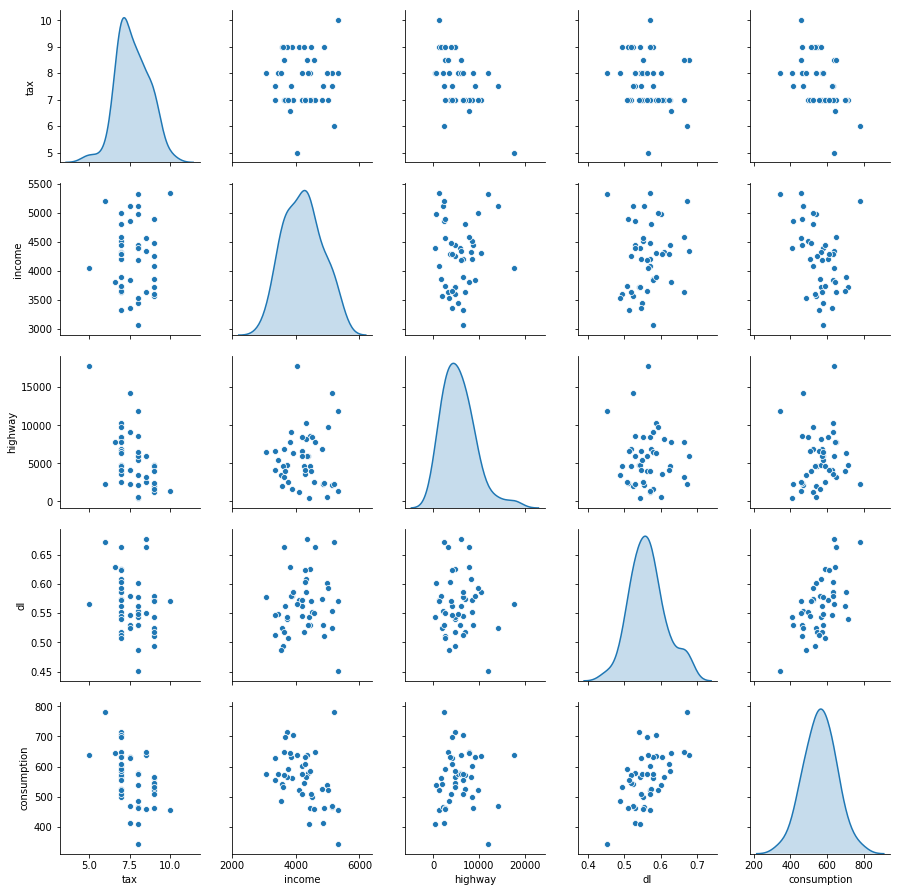

In [12]:
sns.pairplot(pt,diag_kind='kde')

In [13]:
pt.corr()

,tax,income,highway,dl,consumption
tax,1.000000,0.028917,-0.535243,-0.251519,-0.472685
income,0.028917,1.000000,0.050926,0.115030,-0.404929
highway,-0.535243,0.050926,1.000000,-0.058466,0.065716
dl,-0.251519,0.115030,-0.058466,1.000000,0.600198
consumption,-0.472685,-0.404929,0.065716,0.600198,1.000000


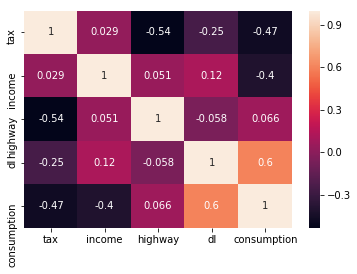

In [14]:
sns.heatmap(pt.corr(),annot=True)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [15]:
X=pt[['tax','income','highway','dl']]
X.head()

,tax,income,highway,dl
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [16]:
Y=pt['consumption']
Y.head()

0    541
1    524
2    561
3    414
4    410
Name: consumption, dtype: int64

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36, 4) (10, 4) (36,) (10,)


In [19]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36, 4) (10, 4) (36, 1) (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [1]:
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()

In [20]:
model=linearreg.fit(x_train,y_train)

In [25]:
coe=linearreg.coef_
coe

array([[-2.14667016e+01, -7.70228290e-02,  1.24077922e-03,
         9.34193337e+02]])

In [24]:
coedf=pd.DataFrame(coe,index=['coefficient'],columns=X.columns)
coedf

,tax,income,highway,dl
coefficient,-21.466702,-0.077023,0.001241,934.193337


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [27]:
model.score(x_train,y_train)

0.7019800748577412

In [28]:
model.score(x_test,y_test)

0.49547364193684823

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [31]:
X1=X[['income','highway']]
X1.head(5)

,income,highway
0,3571,1976
1,4092,1250
2,3865,1586
3,4870,2351
4,4399,431


In [32]:
model1=linearreg.fit(X1,Y)

# Question 9: Print the coefficients of the multilinear regression model

In [37]:
model1.coef_

array([-0.0613729 ,  0.00212085])

In [39]:
model1.score(X1,Y)

0.1714411067798841

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
#As the R2 value is decreasing with decrease in independent variables 
#to find the better model we have to consider more indepedent variables in this example